<a href="https://colab.research.google.com/github/prteek/IO/blob/master/genesis_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dash coin

In [1]:
# This cell is not required to be executed (i.e. ignore any error) if Notebook is run locally or in Binder
# Authorise and mount google drive to access code and data files

project_folder = '/content/drive/My Drive/git_repos/IO/'

import os

if os.path.isdir('/content'):
    from google.colab import drive
    drive.mount('/content/drive')

    if not(os.path.isdir(project_folder)):
      os.makedirs(project_folder)
      print("new project folder created")

    os.chdir(project_folder)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# User input *Refer https://www.coinwarz.com/cryptocurrency/coins/dash
currentPrice       = 155; # [$/coin]
calculationPeriod  = 1; # [days]
hashRate           = 10500e6; # [Hashes/sec]
blockReward        = 1.67279914; # [coins/block]
difficulty         = 102015138.1383; # [-]
maintenanceFee     = 0.000029; # [$/MH/day] 
contractPrice      = 247; # [$]
contractDuration   = 2; # [years]


In [0]:
# Calculations
import numpy as np
import matplotlib.pyplot as plt
import math as math

def estimatedProfitPerPeriod(currentPrice, calculationPeriod, hashRate, blockReward, difficulty, maintenanceFee):
    secondsInCalculationPeriod  = 3600*24*calculationPeriod; # [sec]
    totalMaintenanceFee         = float(hashRate)*maintenanceFee/1000000*calculationPeriod; # [$]
    coinsPerPeriod              = float(hashRate)*float(secondsInCalculationPeriod)*blockReward/(difficulty*float(2**32))
    estimatedProfit             = round(coinsPerPeriod*currentPrice - totalMaintenanceFee,2); # [$]
    return estimatedProfit

estimatedProfitVectorized   = np.vectorize(estimatedProfitPerPeriod);

estimatedProfitPerDay       = estimatedProfitPerPeriod(currentPrice, calculationPeriod, hashRate, blockReward, difficulty, maintenanceFee);
estimatedARR                = (abs(estimatedProfitPerDay*contractDuration*365/calculationPeriod - contractPrice)/contractPrice)**(1/contractDuration)*np.sign(estimatedProfitPerDay*contractDuration*365/calculationPeriod - contractPrice)


In [0]:
# Results
print("Profit per Day:", estimatedProfitPerDay)
print("Estimated ARR of Contract:", estimatedARR)

Profit per Day: 0.23
Estimated ARR of Contract: -0.5659000927546814


##### A new contract opened up after 1 year and the cost of investment was 55$. Because the current contract output can be re invested into this new contract an assessment of profitability had to be made

In [0]:
# Inputs
priceAtTheTimeOfInvestment = 131; # [$]
initialInvestment          = 55; # [$]
newHashRate                = 5000e6*2; # [Hashes/sec]
newMaintenanceFee          = 0.00001; # [$/MH/day] 
newContractDuration        = 2; # [years]
timeLeftForCurrentContract = 1; # [years]


In [0]:
# Calculations
initialValueOfCurrentContract                = initialInvestment/priceAtTheTimeOfInvestment*currentPrice; # [$]
initialValueOfNewContractAtStart             = 0; # [$]
estimatedProfitPerDayNewContract             = estimatedProfitPerPeriod(currentPrice, calculationPeriod, newHashRate, blockReward, difficulty, newMaintenanceFee);
timeCurrentContract                          = [i for i in range(timeLeftForCurrentContract*365)]; # [days]
timeNewContractAfterCurrentContractExpires   = [i for i in range((newContractDuration - timeLeftForCurrentContract)*365)]; # [days]

profitCurrentContract                        = initialValueOfCurrentContract + estimatedProfitVectorized(currentPrice, timeCurrentContract, hashRate, blockReward, difficulty, maintenanceFee);
profitNewContractCommonTime                  = profitCurrentContract - initialValueOfCurrentContract + initialValueOfNewContractAtStart + estimatedProfitVectorized(currentPrice, timeCurrentContract, newHashRate, blockReward, difficulty, newMaintenanceFee);
profitNewContractAfterCurrentContractExpires = profitNewContractCommonTime[-1] + estimatedProfitVectorized(currentPrice, timeNewContractAfterCurrentContractExpires, newHashRate, blockReward, difficulty, newMaintenanceFee);
profitNewContract                            = [*profitNewContractCommonTime, *profitNewContractAfterCurrentContractExpires]; # [$]
timeNewContract                              = [i for i in range(newContractDuration*365)];


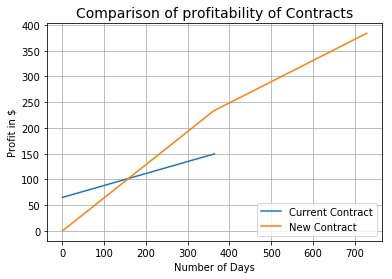

In [0]:
# Comparison of profitability
plt.plot(timeCurrentContract, profitCurrentContract, label='Current Contract')
plt.plot(timeNewContract, profitNewContract, label='New Contract')
plt.title("Comparison of profitability of Contracts", size=14)
plt.xlabel("Number of Days")
plt.ylabel("Profit in $")
plt.legend(loc='lower right')
plt.grid()
